In [6]:
'''
import os
import subprocess
"""
for x in os.listdir("./Pop"): 
    if x[-4: ] == ".mp3":
        command  = ["ffmpeg", "-i", "./Pop/" + x, "./Pop/Pop_wav/" + x[:-4] + ".wav"]
        subprocess.call(command)
"""
for x in os.listdir("./Jazz"): 
    if x[-4: ] == ".mp3":
        command  = ["ffmpeg", "-i", "./Jazz/" + x, "./Jazz/Jazz_wav/" + x[:-4] + ".wav"]
        subprocess.call(command)
        
from pydub import AudioSegment

t1 = 0 * 1000 #Works in milliseconds
t2 = 30 * 1000
newAudio = AudioSegment.from_wav("./Jazz/Jazz_wav/01 Blue In Green.wav")
newAudio = newAudio[t1:t2]
newAudio.export('./Jazz/Jazz_wav/01 Blue In Green 00.wav', format="wav")

'''

'\nimport os\nimport subprocess\n"""\nfor x in os.listdir("./Pop"): \n    if x[-4: ] == ".mp3":\n        command  = ["ffmpeg", "-i", "./Pop/" + x, "./Pop/Pop_wav/" + x[:-4] + ".wav"]\n        subprocess.call(command)\n"""\nfor x in os.listdir("./Jazz"): \n    if x[-4: ] == ".mp3":\n        command  = ["ffmpeg", "-i", "./Jazz/" + x, "./Jazz/Jazz_wav/" + x[:-4] + ".wav"]\n        subprocess.call(command)\n        \nfrom pydub import AudioSegment\n\nt1 = 0 * 1000 #Works in milliseconds\nt2 = 30 * 1000\nnewAudio = AudioSegment.from_wav("./Jazz/Jazz_wav/01 Blue In Green.wav")\nnewAudio = newAudio[t1:t2]\nnewAudio.export(\'./Jazz/Jazz_wav/01 Blue In Green 00.wav\', format="wav")\n\n'

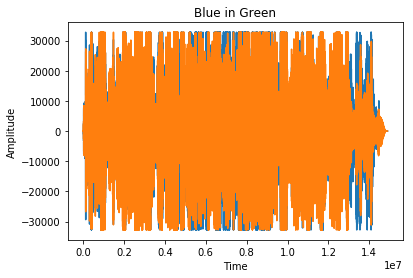

In [5]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# read audio samples
input_data = read("./Jazz/Jazz_wav/01 Blue In Green.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(np.array(audio))
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Blue in Green")
# display the plot
plt.show()

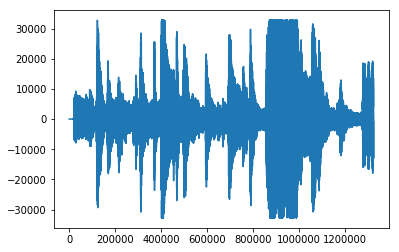

In [7]:
_, d = read("./Jazz/Jazz_wav/01 Blue In Green 00.wav")
plt.plot(d.T[0])
plt.show()

44100


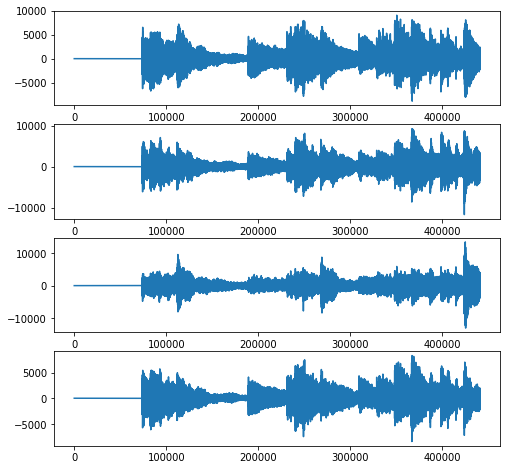

In [18]:
rate, data = read("Piano_half_hour_10/output000.wav")
print(rate)
plt.figure(figsize=(8,8))
plt.subplot(4,1,1)
plt.plot(data.T[0])
plt.subplot(4,1,2)
plt.plot(data.T[1])
plt.subplot(4,1,3)
plt.plot(data.T[0] - data.T[1])
plt.subplot(4,1,4)
plt.plot((data.T[0] + data.T[1])/2)
plt.show()

In [20]:
wavfile.write("output001_mean.wav", rate, np.round(0.5*(data.T[0] + data.T[1])).astype(data.dtype))

In [4]:
import numpy as np
import os
from scipy.io import wavfile
from scipy import interpolate

NEW_SAMPLERATE = 16000
direc = "Piano_half_hour_30_original/"
for x in os.listdir(direc):
    old_samplerate, old_audio = wavfile.read(direc+x)

    if old_samplerate != NEW_SAMPLERATE:
        duration = old_audio.shape[0] / old_samplerate

        time_old  = np.linspace(0, duration, old_audio.shape[0])
        time_new  = np.linspace(0, duration, int(old_audio.shape[0] * NEW_SAMPLERATE / old_samplerate))

        interpolator = interpolate.interp1d(time_old, old_audio.T)
        new_audio = interpolator(time_new).T

        wavfile.write("Piano_30_16kHz/"+ x[:-8]+x[-6:], NEW_SAMPLERATE, np.round(new_audio).astype(old_audio.dtype))

160124


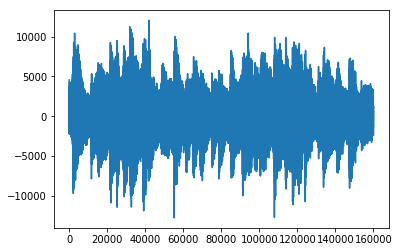

In [5]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline

rate, data = wavfile.read("Piano_10_16kHz/output012.wav")
print(len(data))
plt.plot(data.T[0])
plt.show()

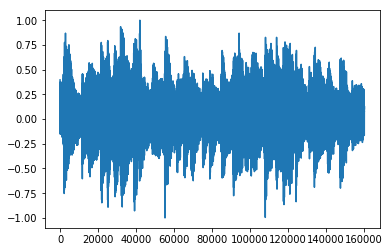

In [18]:
sample = data.T[0]
sample = (sample - min(sample))*(2.0/(max(sample) - min(sample))) - 1.0
plt.plot(sample)